In [1]:
import numpy as np
import matplotlib.pyplot as plt

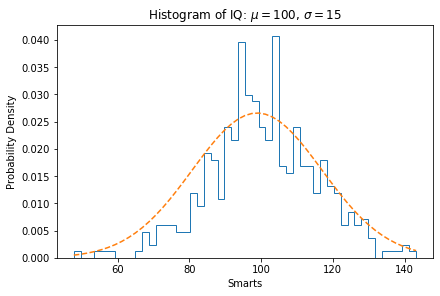

In [42]:
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))

fig, ax = plt.subplots(constrained_layout=True)

n, bins, patches = ax.hist(x, bins=50, density=True, histtype='step')
ax.plot(bins, y, '--')

ax.set_title(f'Histogram of IQ: $\mu={mu}$, $\sigma={sigma}$')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability Density')

plt.show()

In [52]:
n

array([0.00119891, 0.        , 0.        , 0.00119891, 0.00119891,
       0.00119891, 0.        , 0.        , 0.        , 0.00119891,
       0.00479565, 0.00239782, 0.00599456, 0.00599456, 0.00599456,
       0.00479565, 0.00479565, 0.01198912, 0.0095913 , 0.0191826 ,
       0.01798369, 0.01079021, 0.02397825, 0.02158042, 0.03956411,
       0.02997281, 0.0287739 , 0.02397825, 0.02158042, 0.04076302,
       0.01678477, 0.01558586, 0.02397825, 0.01678477, 0.01678477,
       0.01198912, 0.01798369, 0.01318804, 0.01198912, 0.00599456,
       0.00839239, 0.00599456, 0.00719347, 0.00359674, 0.        ,
       0.00119891, 0.00119891, 0.00119891, 0.00239782, 0.00119891])

In [12]:
bins

array([ 55.82353413,  57.61362751,  59.4037209 ,  61.19381429,
        62.98390768,  64.77400107,  66.56409445,  68.35418784,
        70.14428123,  71.93437462,  73.724468  ,  75.51456139,
        77.30465478,  79.09474817,  80.88484156,  82.67493494,
        84.46502833,  86.25512172,  88.04521511,  89.8353085 ,
        91.62540188,  93.41549527,  95.20558866,  96.99568205,
        98.78577543, 100.57586882, 102.36596221, 104.1560556 ,
       105.94614899, 107.73624237, 109.52633576, 111.31642915,
       113.10652254, 114.89661593, 116.68670931, 118.4768027 ,
       120.26689609, 122.05698948, 123.84708286, 125.63717625,
       127.42726964, 129.21736303, 131.00745642, 132.7975498 ,
       134.58764319, 136.37773658, 138.16782997, 139.95792336,
       141.74801674, 143.53811013, 145.32820352])

In [53]:
len(n)

50

In [54]:
len(bins)

51

In [44]:
myarray = np.random.randn(1000)

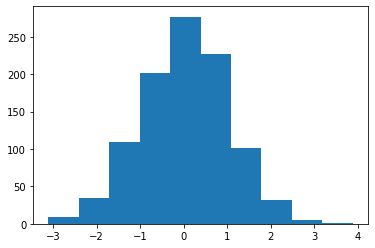

In [57]:
fig, ax = plt.subplots()

ax.hist(myarray);

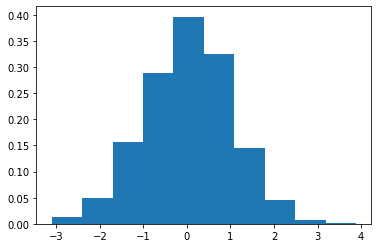

In [56]:
fig, ax = plt.subplots()

ax.hist(myarray, density=True);

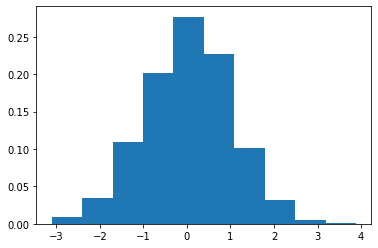

In [55]:
fig, ax = plt.subplots()

weights = np.ones_like(myarray) / len(myarray)
ax.hist(myarray, weights=weights);

In [58]:
from collections import namedtuple

In [62]:
Student = namedtuple('Student', ['name', 'grade', 'gender'])
Score = namedtuple('Score', ['score', 'percentile'])

test_names = ['Pacer Test', 'Flexed Arm\n Hang', 'Mile Run', 'Agility', 'Push Ups']
test_meta = dict(zip(test_names,  ['laps', 'sec', 'min:sec', 'sec', '']))

In [63]:
test_meta

{'Pacer Test': 'laps',
 'Flexed Arm\n Hang': 'sec',
 'Mile Run': 'min:sec',
 'Agility': 'sec',
 'Push Ups': ''}

In [65]:
student = Student('Johnny Doe', 2, 'boy')
scores = dict(zip(test_names, (Score(v, p) for v, p in zip(['7', '48', '12:52', '17', '14'], np.round(np.random.uniform(0, 1, len(test_names)) * 100, 0)))))
cohort_size = 62

In [91]:
def format_score(scr, test):
    """
    Build up the score labels for the right Y-axis by first
    appending a carriage return to each string and then tacking on
    the appropriate meta information (i.e., 'laps' vs 'seconds'). We
    want the labels centered on the ticks, so if there is no meta
    info (like for pushups) then don't add the carriage return to
    the string
    """
    md = test_meta[test]
    if md:
        return f'{scr}\n{md}'
    else:
        return scr


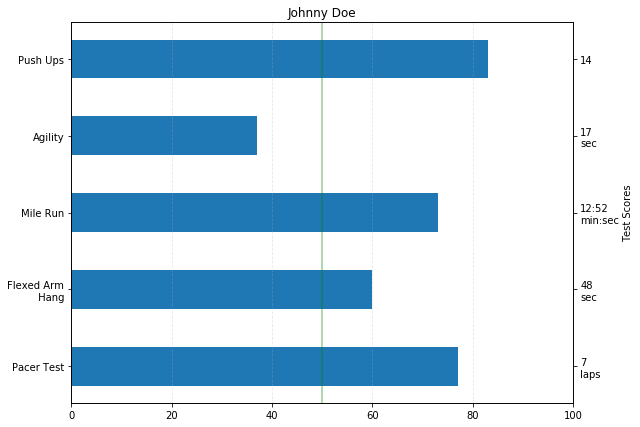

In [101]:
fig, ax = plt.subplots(figsize=(9,7))

pos = np.arange(len(test_names))
rect = ax.barh(pos, [scores[k].percentile for k in test_names], height=0.5, tick_label=test_names)
ax.axvline(50, color='green', alpha=0.4)

ax.set_title(student.name)
ax.set_xlim([0,100])
ax.xaxis.grid(True, linestyle='--', alpha=0.3)

ax2 = ax.twinx()
ax2.set_ylabel('Test Scores')
ax2.set_ylim(ax.get_ylim())

ax2.set_yticks(pos)
score_labels = [format_score(scores[k].score, k) for k in test_names]
ax2.set_yticklabels(score_labels)

plt.show()